# Imports

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_log_error

# Data loading

In [123]:
bike = pd.read_csv("train.csv")
bike_test = pd.read_csv('test.csv')

In [124]:
bike.drop(['casual', 'registered'], axis = 1, inplace =  True)

# EDA

In [125]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [126]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [127]:
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

>No null values.

In [128]:
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


<AxesSubplot:>

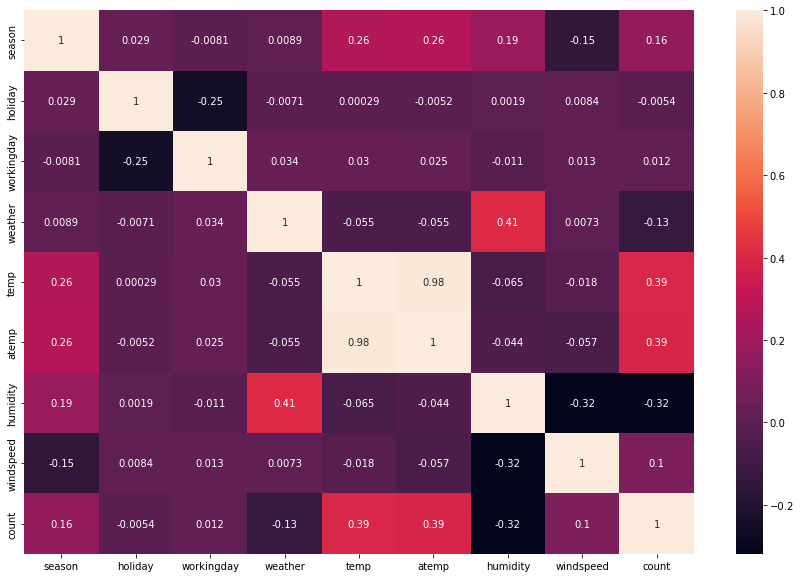

In [129]:
plt.figure(figsize=(15, 10))
sns.heatmap(bike.corr(), annot=True)

## Season

<AxesSubplot:xlabel='season', ylabel='count'>

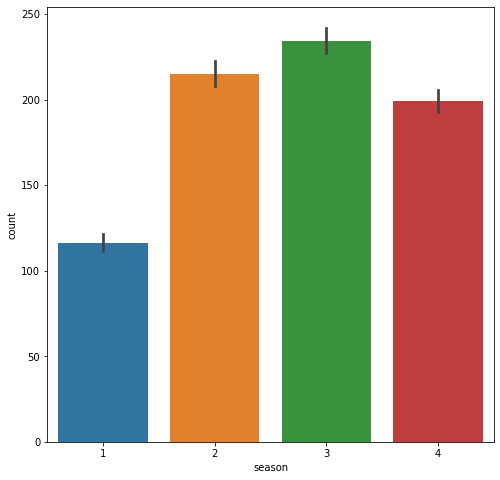

In [130]:
plt.figure(figsize=(8, 8))
sns.barplot(data=bike, x='season', y='count')

>Most of the rental processes occurred in Fall.

## Holiday

<AxesSubplot:xlabel='holiday', ylabel='count'>

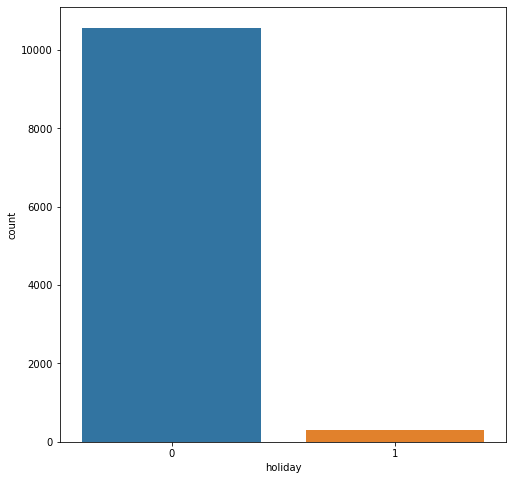

In [131]:
plt.figure(figsize=(8, 8))
sns.countplot(data=bike, x='holiday')

>Most of the rental processes didn't occur on holidays.

## workingday

<AxesSubplot:xlabel='workingday', ylabel='count'>

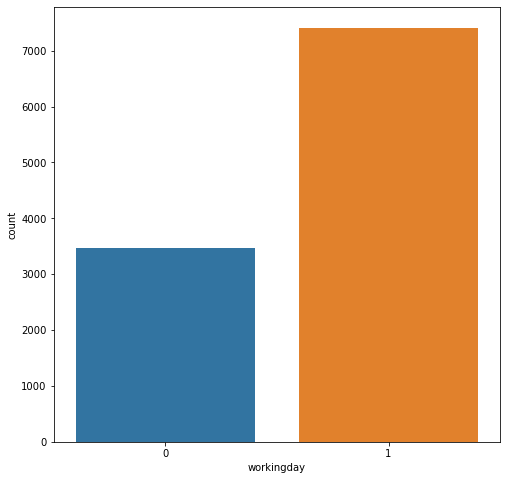

In [132]:
plt.figure(figsize=(8, 8))
sns.countplot(data=bike, x='workingday')

>Most of the rental processes occurred on working days.

## Waeather

In [133]:
bike.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='count'>

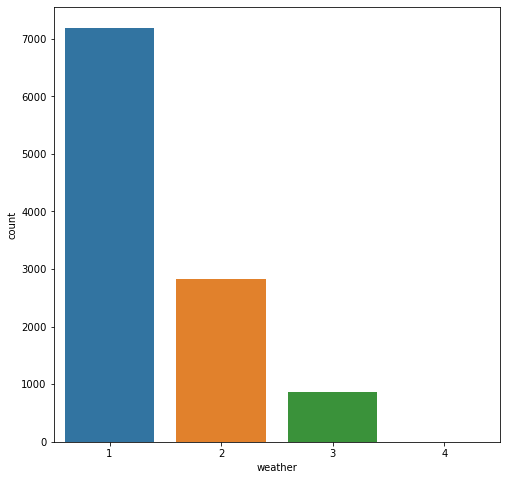

In [134]:
plt.figure(figsize=(8, 8))
sns.countplot(data=bike, x='weather')

>Clear, Few clouds, Partly cloudy and Partly cloudy represent the majority of the weather conditions during which rental processes occur.

>Only one rental process occurred during rough conditions weather.

## temp

<AxesSubplot:xlabel='temp', ylabel='Count'>

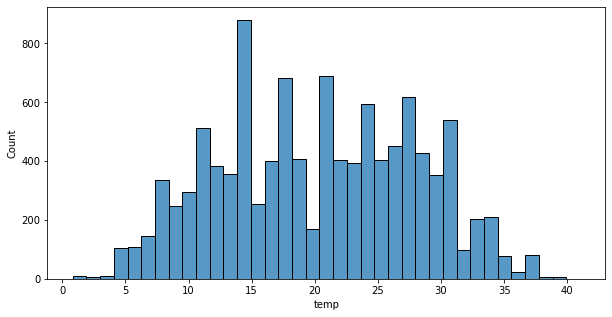

In [135]:
plt.figure(figsize=(10, 5))
sns.histplot(data=bike, x = 'temp')

## atemp

<AxesSubplot:xlabel='atemp', ylabel='Count'>

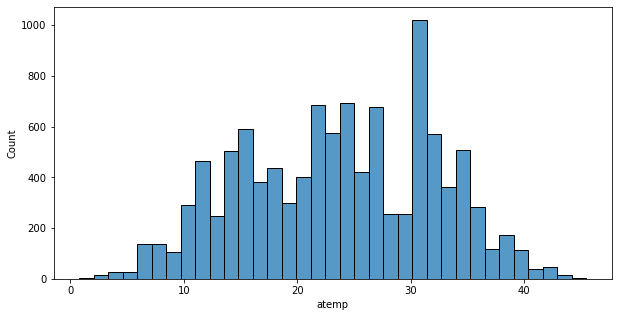

In [136]:
plt.figure(figsize=(10, 5))
sns.histplot(data=bike, x = 'atemp')

## humidity

<AxesSubplot:xlabel='humidity', ylabel='count'>

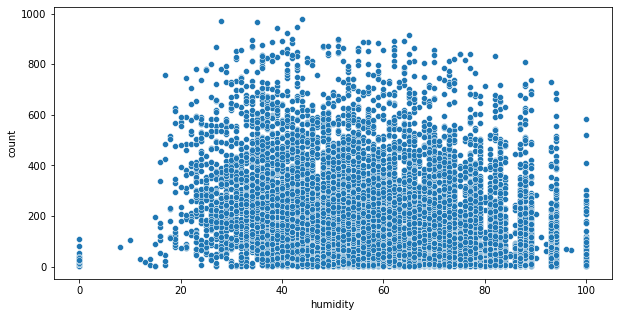

In [137]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data = bike, x = 'humidity', y = 'count')

## windspeed

In [138]:
bike.windspeed.nunique()

28

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

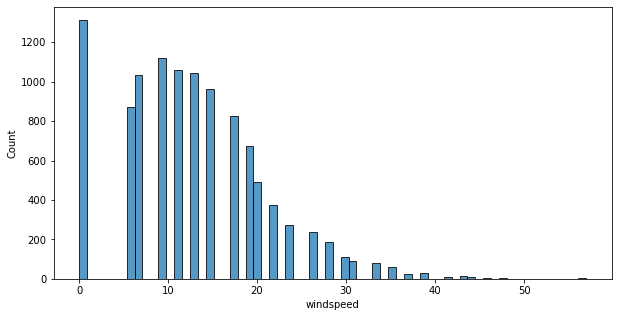

In [139]:
plt.figure(figsize=(10, 5))
sns.histplot(data = bike, x = 'windspeed')

# Data preparation

In [140]:
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [141]:
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


## weather

In [142]:
bike['weather'] = np.where(bike['weather']  > 3, 3, bike['weather'])

## humidity

In [143]:
bike['humidity'].sort_values(ascending=True).unique()

array([  0,   8,  10,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  96,  97, 100], dtype=int64)

In [144]:
bike.groupby('humidity').agg((len))['count']

humidity
0       22
8        1
10       1
12       1
13       1
      ... 
93     205
94     324
96       1
97       1
100    148
Name: count, Length: 89, dtype: int64

In [145]:
bike['humidity'] = np.where(bike['humidity']  < 16, 16, bike['humidity'])

<AxesSubplot:xlabel='humidity', ylabel='count'>

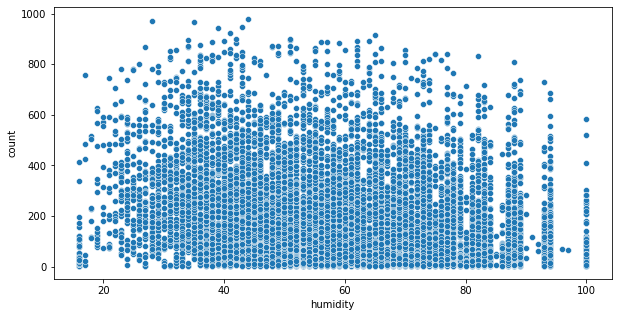

In [146]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data = bike, x = 'humidity', y = 'count')

## temp

<AxesSubplot:xlabel='temp', ylabel='count'>

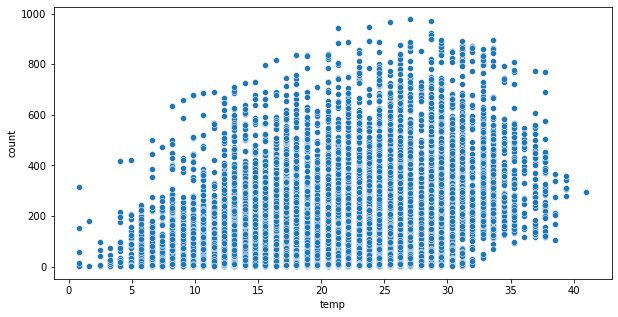

In [147]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data = bike, x = 'temp', y = 'count')

In [148]:
bike['temp'].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [149]:
bike['temp'] = np.where(bike['temp']  > 37.72, 37.72, bike['temp'])
bike['temp'] = np.where(bike['temp']  < 5.74, 5.74, bike['temp'])

<AxesSubplot:xlabel='temp', ylabel='count'>

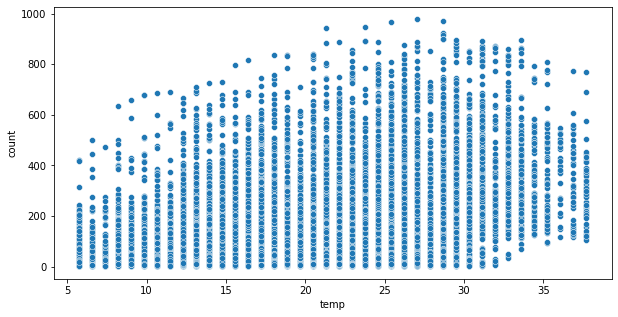

In [150]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data = bike, x = 'temp', y = 'count')

## windspeed

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

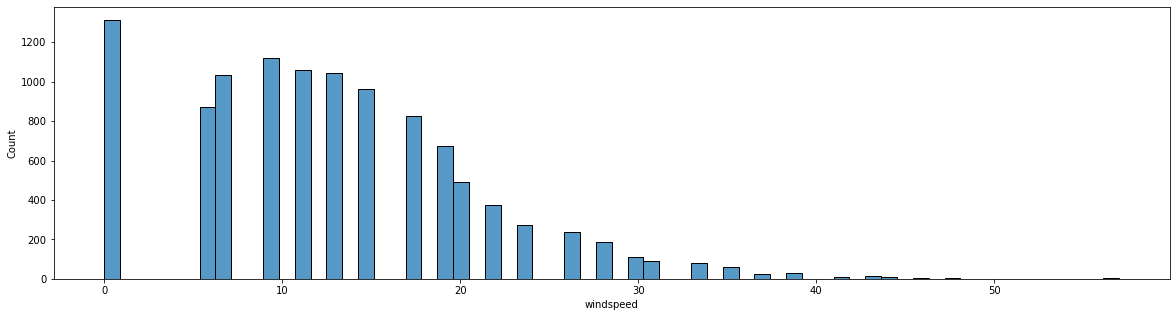

In [151]:
plt.figure(figsize=(20, 5))
sns.histplot(data = bike, x = 'windspeed')

In [152]:
bike.groupby('windspeed').agg((len, min, max))['count']

,len,min,max
windspeed,,,
0.0000,1313,1,970
6.0032,872,1,782
7.0015,1034,1,888
8.9981,1120,1,872
11.0014,1057,1,900
12.9980,1042,1,943
15.0013,961,1,948
16.9979,824,1,977
19.0012,676,1,892


In [153]:
bike['windspeed'] = np.where(bike['windspeed']  > 36.9974, 36.9974, bike['windspeed'])

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

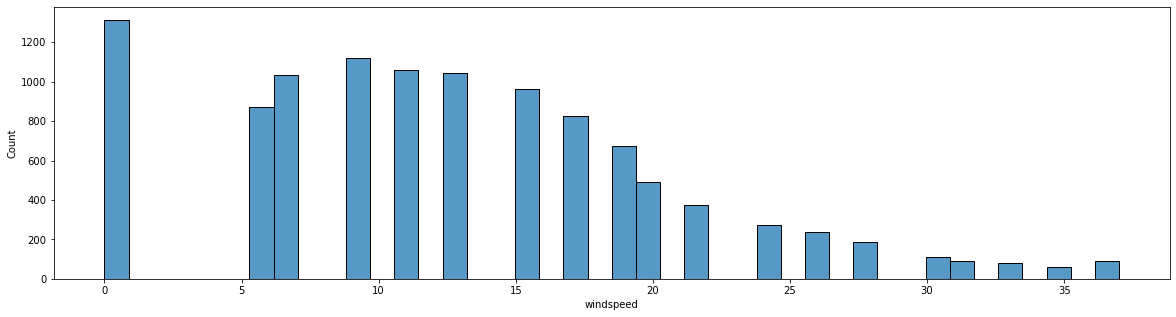

In [154]:
plt.figure(figsize=(20, 5))
sns.histplot(data = bike, x = 'windspeed')

## atemp

<AxesSubplot:>

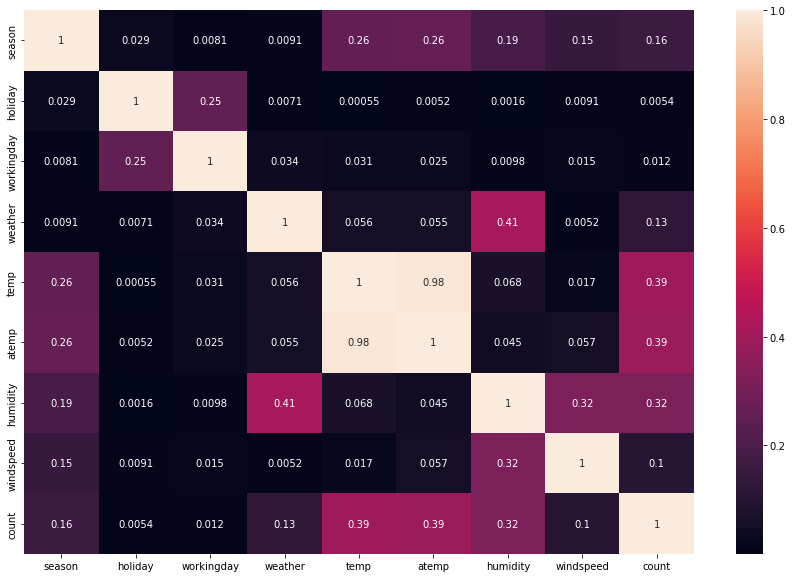

In [155]:
plt.figure(figsize=(15, 10))
sns.heatmap(np.abs(bike.corr()), annot=True) 

> There is high correlation between temp and atemp features, so I will drop one of them to avoid multicollinearity.

In [156]:
bike = bike.drop('atemp', axis = 1)

## datetime

In [157]:
bike[['date','time']] =bike["datetime"].str.split(" ", expand = True)
bike['hour']=bike['time'].str.split(":",expand = True)[0]
bike[['year','month', 'day']] =bike["date"].str.split("-", expand = True)

In [158]:
bike.drop(['datetime', 'date', 'time'], axis = 1, inplace = True)

In [159]:
bike[['hour','year', 'month', 'day']] = bike[['hour','year', 'month', 'day']].astype('int64')

In [160]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   count       10886 non-null  int64  
 8   hour        10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 1020.7 KB


<AxesSubplot:>

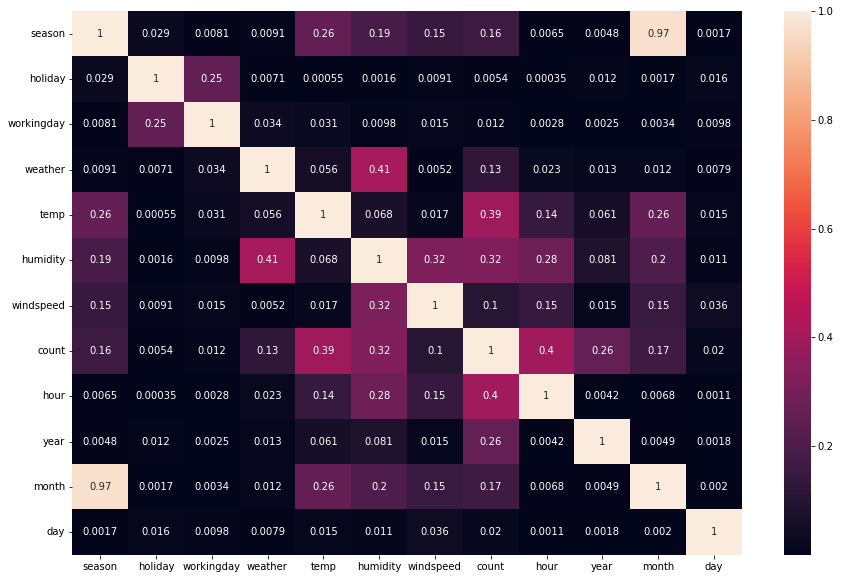

In [161]:
plt.figure(figsize=(15, 10))
sns.heatmap(np.abs(bike.corr()), annot=True) 

## test dataset preparation

In [162]:
bike_test['weather'] = np.where(bike_test['weather']  > 3, 3, bike_test['weather'])

In [163]:
bike_test['humidity'] = np.where(bike_test['humidity']  < 16, 16, bike_test['humidity'])

In [164]:
bike_test['temp'] = np.where(bike_test['temp']  > 37.72, 37.72, bike_test['temp'])
bike_test['temp'] = np.where(bike_test['temp']  < 5.74, 5.74, bike_test['temp'])

In [165]:
bike_test['windspeed'] = np.where(bike_test['windspeed']  > 36.9974, 36.9974, bike_test['windspeed'])

In [166]:
bike_test = bike_test.drop('atemp', axis = 1)

In [167]:
bike_test[['date','time']] =bike_test["datetime"].str.split(" ", expand = True)
bike_test['hour']=bike_test['time'].str.split(":",expand = True)[0]
bike_test[['year','month', 'day']] =bike_test["date"].str.split("-", expand = True)
bike_test.drop(['date', 'time'], axis = 1, inplace = True)
bike_test[['hour','year', 'month', 'day']] = bike_test[['hour','year', 'month', 'day']].astype('int64')

# Models

In [168]:
x = bike.drop(['count'], axis=1)
y = np.log(bike['count'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

## linear regression

In [169]:
lin_regression = LinearRegression()
lin_regression.fit(x_train, y_train)

LinearRegression()

In [170]:
mean_squared_log_error(y_val, lin_regression.predict(x_val))


0.07688639811541086

## Lasso regression

In [171]:
lasso_reg = Lasso(alpha = 0.01) 
lasso_reg.fit(x_train, y_train) 

Lasso(alpha=0.01)

In [172]:
mean_squared_log_error(y_val, lasso_reg.predict(x_val))


0.07707004111430231

## Ridge regression

In [173]:
ridge_reg = linear_model.Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train) 

Ridge(alpha=0.5)

In [174]:
mean_squared_log_error(y_val, lasso_reg.predict(x_val))

0.07707004111430231

> I will conitnue with ridge regression model

In [175]:
bike_test.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,hour,year,month,day
0,2011-01-20 00:00:00,1,0,1,1,10.66,56,26.0027,0,2011,1,20
1,2011-01-20 01:00:00,1,0,1,1,10.66,56,0.0000,1,2011,1,20
2,2011-01-20 02:00:00,1,0,1,1,10.66,56,0.0000,2,2011,1,20
3,2011-01-20 03:00:00,1,0,1,1,10.66,56,11.0014,3,2011,1,20
4,2011-01-20 04:00:00,1,0,1,1,10.66,56,11.0014,4,2011,1,20


In [176]:
bike_test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'hour', 'year', 'month', 'day'],
      dtype='object')

In [177]:
prediction = np.exp(ridge_reg.predict(bike_test.drop('datetime', axis = 1))).astype(int)

In [178]:
submission = pd.DataFrame(bike_test['datetime'])

In [179]:
submission['count'] = prediction

In [180]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11
1,2011-01-20 01:00:00,12
2,2011-01-20 02:00:00,13
3,2011-01-20 03:00:00,15
4,2011-01-20 04:00:00,17


In [181]:
submission.to_csv('submission.csv', index = False)